<h3>Programming Project 2</h3>
<hr>
Due Tuesday by 11:59pm  |  Points: 100 |  Submitting a text entry box

Write a program that analyzes the given size exclusion chromatogram.
Turn in your code on Canvas and also upload to your GitHub account. 
Be sure that the second line of your code includes a comment with a 
link to your GitHub account. For the given size exclusion chromatogram
(see figure below):

Write a program that will parse and plot the given chromatogram file.
Identify the peaks and delineate their boundaries 
(i.e. peak 1 begins at time 65 and ends at time 71).For each peak you 
identify, report the time at which their maximum occurred and the maximum
absorbance values.

For full credit, your program must run without errors.
I recommend you use numpy for the peak finding algorithm, 
but I don’t require it.

Be sure to comment your work so that I can figure out what you’re trying to do.

The chromatogram file is located in my GitHub repository at  
<a href ="https://raw.githubusercontent.com/sstagg/bch5884/master/superose6_50.asc" target="_blank">
click here.</a>

I encourage you to collaborate on this program. Feel free to work together to figure 
out the best algorithms to solve this problem.figure_1.png.
<img src ="img.png">

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
from scipy.signal import *

In [3]:
with open("superose6_50.asc","r") as f:
    dataFile = f.readlines()
time = []
intensity = []
for line in dataFile[3:]:
    data = line.split()
    try:
        time.append(float(data[0]))
        intensity.append(float(data[1]))
    except:
        print("Could not parse the data",line)
        continue 
di = np.gradient(intensity)
ddi = np.gradient(di)

Could not parse the data          	            


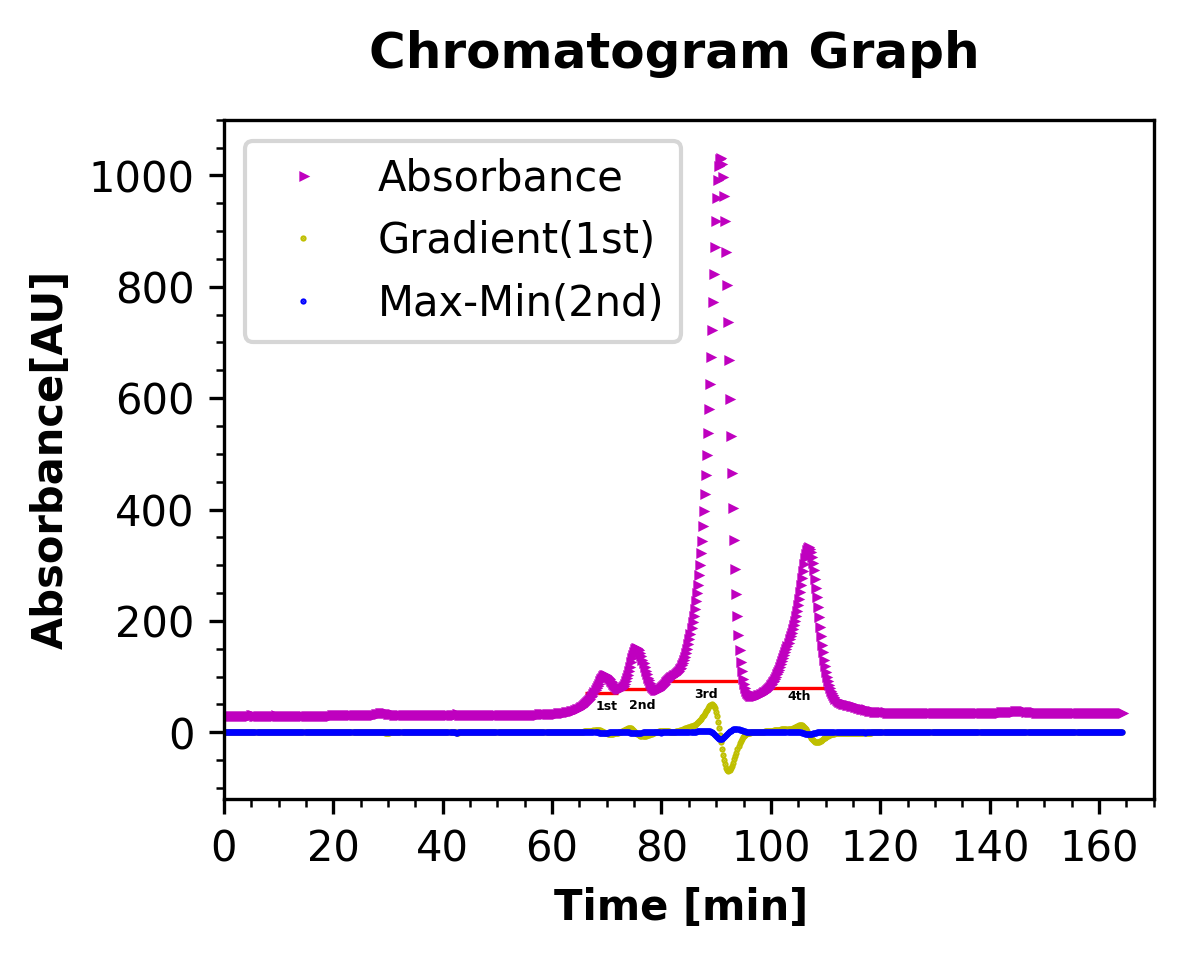

In [81]:
fig = plt.figure(figsize=(4, 3), dpi=300, facecolor='w', edgecolor='k')
fig.suptitle('Chromatogram Graph', fontsize=12, fontweight='bold')

ax = fig.add_subplot(111)

ax.set_xlabel("Time [min] ",fontweight='bold',fontsize = 10)
ax.set_ylabel("Absorbance[AU]",fontweight='bold',fontsize = 10)


ax.plot(time, intensity, '>m',markersize = 1, label = "Absorbance")
ax.plot(time,di, ".y", markersize =1, label = "Gradient(1st)")
ax.plot(time,ddi, "ob", markersize =0.5, label = "Max-Min(2nd)")

ax.legend(loc='upper left',fontsize=10)

ax.hlines(y=70, xmin=66, xmax=72, linewidth=0.8, color='r')
ax.hlines(y=78, xmin=72, xmax=79, linewidth=0.8, color='r')
ax.hlines(y=92, xmin=80, xmax=94, linewidth=0.8, color='r')
ax.hlines(y=80, xmin=100, xmax=110, linewidth=0.8, color='r')


ax.text(68, 40, r'1st', fontsize=3, fontweight = 'bold')
ax.text(74, 42, r'2nd', fontsize=3, fontweight = 'bold')
ax.text(86, 62, r'3rd', fontsize=3, fontweight = 'bold')
ax.text(103, 58, r'4th', fontsize=3, fontweight = 'bold')

ax.axis([-0, 170, -120, 1100])
ax.set_xticks(np.arange(-0,170,20))
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax.xaxis.set_minor_locator(tck.AutoMinorLocator())

plt.show()

In [16]:
peaks, _= find_peaks(intensity, height = 100)

In [17]:
print(peaks)

[372 404 486 572]


In [18]:
intensity[372]

102.822

In [19]:
time[peaks[0]]

69.44

In [82]:
for i in range(len(peaks)):
    print("Peak No. {} occurs at time {:.0f} min and has height {:.0f} AU."
          .format(i+1,time[peaks[i]],intensity[peaks[i]]))

Peak No. 1 occurs at time 69 min and has height 103 AU.
Peak No. 2 occurs at time 75 min and has height 151 AU.
Peak No. 3 occurs at time 91 min and has height 1032 AU.
Peak No. 4 occurs at time 107 min and has height 332 AU.


In [15]:
for i in range(len(peaks)):
    print("Peak No. {:.0f}".format(time[peaks[i]]))

Peak No. 69
Peak No. 75
Peak No. 91
Peak No. 107


In [90]:
print("Summary:")
print("**************************************************************************************")
print("Peak No.  Starting Position[min]   Ending Position[min] Peak Position[min]  Height[AU]")
print("________  ______________________   ___________________  __________________  __________")
print("    1              65                     71                     69              103")
print("    2              73                     79                     75              151")
print("    3              83                     97                     91             1032")
print("    4              100                   112                    107              332")
print("**************************************************************************************")
print("Done!")

Summary:
**************************************************************************************
Peak No.  Starting Position[min]   Ending Position[min] Peak Position[min]  Height[AU]
________  ______________________   ___________________  __________________  __________
    1              65                     71                     69              103
    2              73                     79                     75              151
    3              83                     97                     91             1032
    4              100                   112                    107              332
**************************************************************************************
Done!
